# Quantopian Research Basics

**Please remember that this notebook will only work on Quantopian!**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting Information

Let's go over a few key functions:

* get_pricing()
* symbols()
* local_csv()
* get_backtest()
* get_fundamentals()

**get_pricing()**

In [2]:
mcdon = get_pricing('MCD',
                    start_date='2017-01-01', 
                    end_date = '2017-02-01', 
                    frequency='minute')

In [3]:
mcdon.head()

,open_price,high,low,close_price,volume,price
2017-01-03 14:31:00+00:00,121.86,121.86,121.57,121.63,123665.0,121.63
2017-01-03 14:32:00+00:00,121.73,121.92,121.41,121.45,13536.0,121.45
2017-01-03 14:33:00+00:00,121.45,121.79,121.45,121.52,17562.0,121.52
2017-01-03 14:34:00+00:00,121.45,121.80,121.44,121.75,12072.0,121.75
2017-01-03 14:35:00+00:00,121.74,122.00,121.66,121.99,8100.0,121.99


In [4]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


In [5]:
mcdon = get_pricing('MCD',
                    start_date='2005-01-01', 
                    end_date = '2017-01-01', 
                    frequency='daily')

In [6]:
mcdon.head()

,open_price,high,low,close_price,volume,price
2005-01-03 00:00:00+00:00,22.110,22.550,22.068,22.271,4324900.0,22.271
2005-01-04 00:00:00+00:00,22.208,22.606,22.208,22.424,5149200.0,22.424
2005-01-05 00:00:00+00:00,22.446,22.578,22.278,22.285,3840200.0,22.285
2005-01-06 00:00:00+00:00,22.278,22.537,22.250,22.467,3502500.0,22.467
2005-01-07 00:00:00+00:00,22.411,22.516,22.201,22.278,3458700.0,22.278


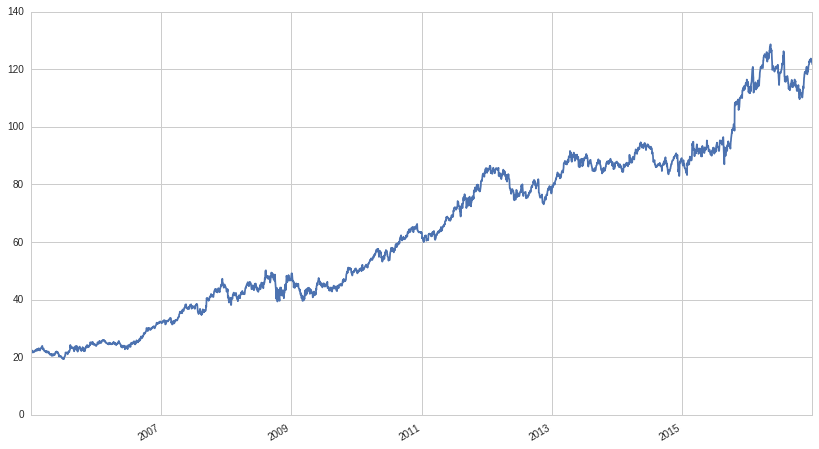

In [7]:
mcdon['close_price'].plot()

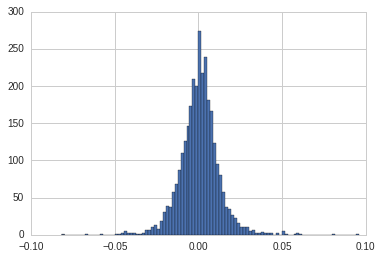

In [8]:
mcdon['close_price'].pct_change(1).hist(bins=100,figsize=(6,4))

**symbols()**

In [10]:
mcdon_eq_info = symbols('MCD')

In [11]:
type(mcdon_eq_info)

<type 'zipline.assets._assets.Equity'>

In [12]:
mcdon_eq_info.to_dict()

{'asset_name': u'MCDONALDS CORP',
 'auto_close_date': Timestamp('2018-06-14 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2018-06-11 00:00:00+0000', tz='UTC'),
 'exchange': u'NYSE',
 'exchange_full': u'NEW YORK STOCK EXCHANGE',
 'first_traded': None,
 'sid': 4707,
 'start_date': Timestamp('2002-01-01 00:00:00+0000', tz='UTC'),
 'symbol': u'MCD'}

**get_fundamentals()**

In [15]:
fundamentals = init_fundamentals()

ValueError: The `init_fundamentals` method has been removed. To use fundamental data in your notebooks and algorithms, use Pipeline.
See: https://www.quantopian.com/help#fundamental-data

In [ ]:
my_funds = get_fundamentals(my_query,'2017-01-01')

In [ ]:
my_funds.info()

In [ ]:
my_funds

In [ ]:
big_companies = (query(fundamentals.valuation.market_cap).
                 filter(fundamentals.valuation.market_cap > 500000000000) )

In [ ]:
my_big_funds = get_fundamentals(big_companies,'2017-07-19')

In [ ]:
my_big_funds

# Basic Algorithm Methods

**initialize()**

initialize() is called exactly once when our algorithm starts and requires context as input.

context is an augmented Python dictionary used for maintaining state during our backtest or live trading, and can be referenced in different parts of our algorithm. context should be used instead of global variables in the algorithm. Properties can be accessed using dot notation (context.some_property).

** handle_data() **

handle_data() is called once at the end of each minute and requires context and data as input. context is a reference to the same dictionary in initialize() and data is an object that stores several API functions.

## Our Tech Stock Optimized Portfolio

In [ ]:
def initialize(context):
    # Reference to Tech Stocks
    context.aapl = sid(24)
    context.csco = sid(1900)
    context.amzn = sid(16841)

def handle_data(context, data):
    # Position our portfolio optimization!
    order_target_percent(context.aapl, .27)
    order_target_percent(context.csco, .20)
    order_target_percent(context.amzn, .53)

### Grabbing Current Data

**data.current()**

data.current() can be used to retrieve the most recent value of a given field(s) for a given asset(s). data.current() requires two arguments: the asset or list of assets, and the field or list of fields being queried. Possible fields include 'price', 'open', 'high', 'low', 'close', and 'volume'. The output type will depend on the input types

In [ ]:
def initialize(context):
    # Reference to Tech Stocks
    context.techies = [sid(16841),sid(24),sid(1900)]

def handle_data(context, data):
    # Position our portfolio optimization!
    tech_close = data.current(context.techies,'close')
    print(tech_close) # Closing Prices
    print(type(tech_close)) # Pandas Series

**data.is_stale()**

In [ ]:
def initialize(context):
    # Reference to Tech Stocks
    context.techies = [sid(16841),sid(24),sid(1900)]

def handle_data(context, data):
    print(data.is_stale(sid(24)))

### Checking for trading

**data.can_trade()**

data.can_trade() is used to determine if an asset(s) is currently listed on a supported exchange and can be ordered. If data.can_trade() returns True for a particular asset in a given minute bar, we are able to place an order for that asset in that minute. This is an important guard to have in our algorithm if we hand-pick the securities that we want to trade. It requires a single argument: an asset or a list of assets.

In [ ]:
def initialize(context):
    # Reference to amazn
    context.amzn = sid(16841)
    
def handle_data(context, data):
    # This insures we don't hit an exception!
    if data.can_trade(sid(16841)):
        order_target_percent(context.amzn, 1.0)

## Checking Historical Data

In [ ]:
def initialize(context):
    context.assets = [sid(24), sid(1900), sid(16841)]

def before_trading_start(context,data):
    price_history = data.history(context.assets,fields="price", bar_count=5, frequency="1d")
    print(price_history)

## Scheduling

In [ ]:
def initialize(context):
    context.appl = sid(49051)

    # At ebginning of trading week
    # At Market Open, set 10% of portfolio to be apple
    schedule_function(open_positions, date_rules.week_start(), time_rules.market_open())
    
    # At end of trading week
    # 30 min before market close, dump all apple stock.
    schedule_function(close_positions, date_rules.week_end(), time_rules.market_close(minutes=30))

def open_positions(context, data):
    order_target_percent(context.appl, 0.10)

def close_positions(context, data):
    order_target_percent(context.appl, 0)

## Portfolio Information

In [ ]:
def initialize(context):
    context.amzn = sid(16841)
    context.ibm = sid(3766)

    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())
    schedule_function(record_vars, date_rules.every_day(), time_rules.market_close())

def rebalance(context, data):
    # Half of our portfolio long on amazn
    order_target_percent(context.amzn, 0.50)
    # Half is shorting IBM
    order_target_percent(context.ibm, -0.50)

def record_vars(context, data):
    # Plot the counts
    record(amzn_close=data.current(context.amzn,'close'))
    record(ibm_close=data.current(context.ibm,'close'))

## Slippage and Commision

**Slippage**

In [ ]:
set_slippage(slippage.VolumeShareSlippage(volume_limit=0.025, price_impact=0.1))

**Commision**

In [ ]:
set_commission(commission.PerShare(cost=0.0075, min_trade_cost=1))

# First Trading Algorithm

## Pairs Trading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
start = "2015-01-01"
end = "2017-01-01"

united = get_pricing("UAL", start, end)
american = get_pricing("AAL", start, end)

In [18]:
united.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,67.740,68.08,65.71,66.380,5678309.0,66.380
2015-01-05 00:00:00+00:00,66.870,67.35,65.50,66.140,4263592.0,66.140
2015-01-06 00:00:00+00:00,66.630,67.00,63.11,64.599,5422328.0,64.599
2015-01-07 00:00:00+00:00,64.959,66.11,64.00,65.530,4230901.0,65.530
2015-01-08 00:00:00+00:00,65.700,67.52,65.41,66.540,5515839.0,66.540


In [19]:
american.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,53.222,53.536,52.036,52.859,9507330.0,52.859
2015-01-05 00:00:00+00:00,53.310,53.477,52.301,52.830,10401276.0,52.830
2015-01-06 00:00:00+00:00,53.212,53.369,51.114,52.006,12491282.0,52.006
2015-01-07 00:00:00+00:00,52.340,52.605,51.104,51.967,9316925.0,51.967
2015-01-08 00:00:00+00:00,52.438,53.222,52.212,52.614,8802391.0,52.614


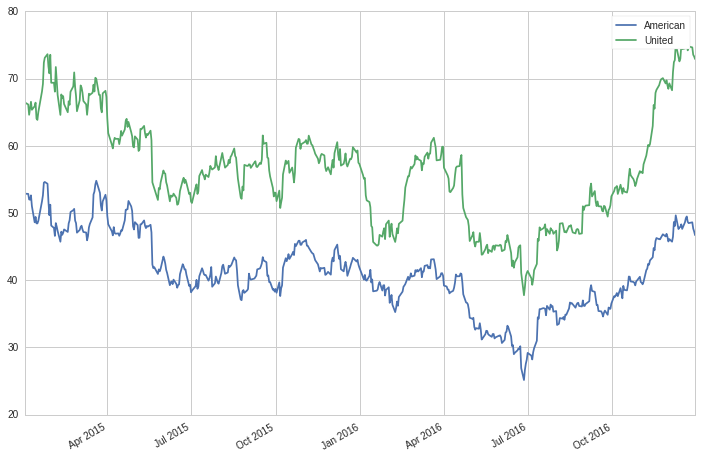

In [20]:
american["close_price"].plot(label="American", figsize=(12,8))
united["close_price"].plot(label="United")
plt.legend()

## Correlation and Spread

In [21]:
np.corrcoef(american["close_price"], united["close_price"])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

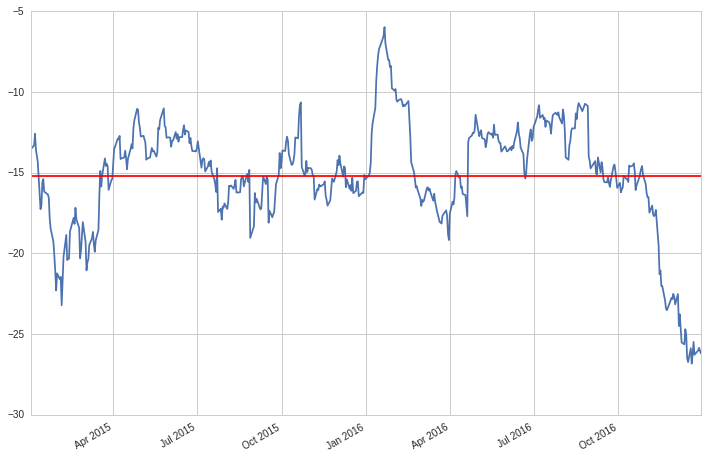

In [22]:
spread = american["close_price"] - united["close_price"]
spread.plot(label="Spread", figsize=(12,8))
plt.axhline(spread.mean(),c='r')

## Normalizing with a z-score

In [23]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

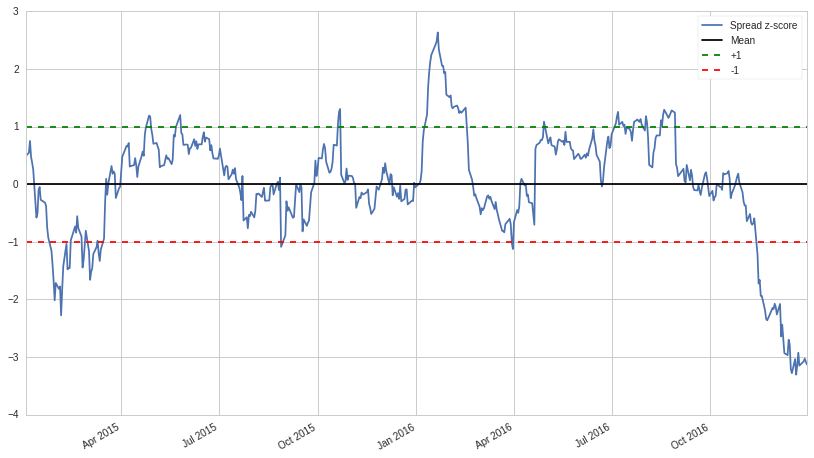

In [24]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='g', ls='--')
plt.axhline(-1.0, c='r', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

## Rolling Z-Score

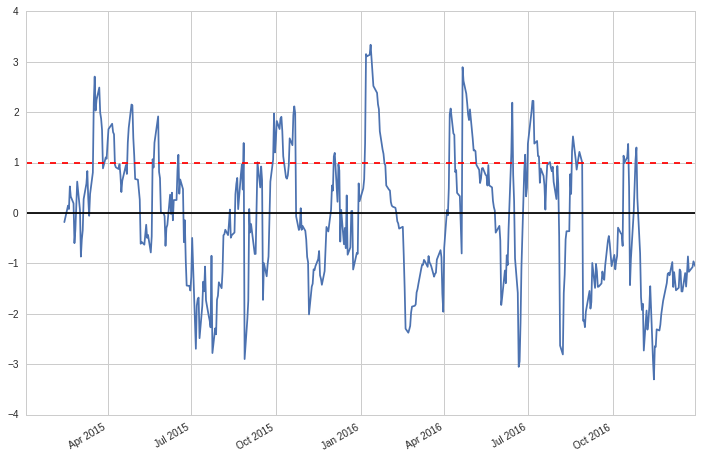

In [25]:
#1 day moving average of the price spread
spread_mavg1 = spread.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30 = spread.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30 = spread.rolling(30).std()

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30

zscore_30_1.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--');

## Implementation of Strategy

In [ ]:
# Quantopian Algorithms
import numpy as np

# initialize - schedule function
def initialize(context):
    """
    Called once at the start of the algorithm.
    """
    # Every day we check the pair status
    schedule_function(check_pairs, date_rules.every_day(), time_rules.market_close(minutes=60))
    
    # Our Two Airlines
    context.aa = sid(45971) #aal
    context.ual = sid(28051) #ual   
    
    # Flags to tell us if we're currently in a trade
    context.long_on_spread = False
    context.shorting_spread = False

# check_pairs
def check_pairs(context, data):
    # For convenience
    aa = context.aa
    ual = context.ual
    
    # Get pricing history
    prices = data.history([aa, ual], "price", 30, '1d')
 
    # Need to use .iloc[-1:] to get dataframe instead of series
    short_prices = prices.iloc[-1:]
    
    # SPREAD
    
    # Get the long 30 day mavg
    mavg_30 = np.mean(prices[aa] - prices[ual])
    
    # Get the std of the 30 day long window
    std_30 = np.std(prices[aa] - prices[ual])
    
    # Get the shorter span 1 day mavg
    mavg_1 = np.mean(short_prices[aa] - short_prices[ual])
    
    # Compute z-score
    if std_30 > 0:
        zscore = (mavg_1 - mavg_30)/std_30
    
        # Our two entry cases
        if zscore > 0.5 and not context.shorting_spread:
            # spread = aa - ual
            order_target_percent(aa, -0.5) # short top
            order_target_percent(ual, 0.5) # long bottom
            context.shorting_spread = True
            context.long_on_spread = False
            
        elif zscore < -0.5 and not context.long_on_spread:
            # spread = aa - ual
            order_target_percent(aa, 0.5) # long top
            order_target_percent(ual, -0.5) # short bottom
            context.shorting_spread = False
            context.long_on_spread = True
            
        # Our exit case
        elif abs(zscore) < 0.1:
            order_target_percent(aa, 0)
            order_target_percent(ual, 0)
            context.shorting_spread = False
            context.long_on_spread = False
        
        record('zscore', zscore)

# Trading Algorithm Exercise Solutions

** This is an extremely open exercise and there are lots of ways to do it! Please feel free to just skip to the solutions to treat it as an example code along. If you attempt the exercise, do not expect the example solution to exactly match up to your solution. You may have performed much better (or much worse)! **

## Your Task

Your manager wants to see if [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands) are still a meaningful technical analysis strategy on their own. For this exercise, you will be testing *Johnson and Johnson* sid(4151).Specifically, your manager has decided he wants set 100% of the portfolio to go long when the stock price is below 2 times the 20 day rolling standard deviation subtracted from the 20 day moving average, and go 100% short of the portfolio on that stock when the current price is above 2 times the 20 day rolling standard deviation added on to the 20 day moving average. The check for this signal event should only happen once per day. This is probably a very unreasonable strategy, but the main point of this is to exercise your ability to write out backtest algorithms with Quantopian.

## Time Frame

You should use the following time frame for this exercise (so you can at least have a reasonable comparison to the solutions, but feel free to play around with this!)

#### BACKTEST START:  Jul-20-2014
#### BACKTEST END: Jul-20-2017

In [ ]:
# Setup our variables
def initialize(context):
    context.jj = sid(4151)

    schedule_function(check_bands,date_rules.every_day())
        
def check_bands(context, data):
    
    cur_price = data.current(context.jj,'price')
    
    # Load historical data for the stocks
    prices = data.history(context.jj,'price', 20 , '1d')
    
    avg = prices.mean()
    std = prices.std()
    lower_band = avg - 2*std
    upper_band = avg + 2*std
    
    if cur_price <= lower_band:
        order_target_percent(context.jj, 1.0)
        print('Buying')
        print('Current price is: ' + str(cur_price))
        print("Lower band is: "+str(lower_band))
        
        
    elif cur_price >= upper_band:
        order_target_percent(context.jj, -1.0)
        print('Shorting')
        print('Current price is: ' + str(cur_price))
        print("Upper band is: "+str(upper_band))
    else:
        pass
        
    record(upper=upper_band,
           lower=lower_band,
           mvag_20=avg,
           price=cur_price)

# Pipeline

## Classifiers

In [26]:
from quantopian.pipeline import Pipeline

In [27]:
def make_pipeline():
    return Pipeline()

In [28]:
pipe = make_pipeline()

In [29]:
from quantopian.research import run_pipeline

In [39]:
result = run_pipeline(pipe,'2017-01-03','2017-01-03')

In [31]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8347 entries, (2017-01-03 00:00:00+00:00, Equity(2 [ARNC])) to (2017-01-03 00:00:00+00:00, Equity(50569 [OUSM]))
Empty DataFrame

In [32]:
result.columns

Index([], dtype='object')

In [33]:
result

Empty DataFrame
Columns: []
Index: [(2017-01-03 00:00:00+00:00, Equity(2 [ARNC])), (2017-01-03 00:00:00+00:00, Equity(21 [AAME])), (2017-01-03 00:00:00+00:00, Equity(24 [AAPL])), (2017-01-03 00:00:00+00:00, Equity(25 [ARNC_PR])), (2017-01-03 00:00:00+00:00, Equity(31 [ABAX])), (2017-01-03 00:00:00+00:00, Equity(39 [DDC])), (2017-01-03 00:00:00+00:00, Equity(41 [ARCB])), (2017-01-03 00:00:00+00:00, Equity(52 [ABM])), (2017-01-03 00:00:00+00:00, Equity(53 [ABMD])), (2017-01-03 00:00:00+00:00, Equity(62 [ABT])), (2017-01-03 00:00:00+00:00, Equity(64 [ABX])), (2017-01-03 00:00:00+00:00, Equity(66 [AB])), (2017-01-03 00:00:00+00:00, Equity(67 [ADSK])), (2017-01-03 00:00:00+00:00, Equity(69 [ACAT])), (2017-01-03 00:00:00+00:00, Equity(70 [VBF])), (2017-01-03 00:00:00+00:00, Equity(76 [TAP])), (2017-01-03 00:00:00+00:00, Equity(84 [ACET])), (2017-01-03 00:00:00+00:00, Equity(100 [IEP])), (2017-01-03 00:00:00+00:00, Equity(106 [ACU])), (2017-01-03 00:00:00+00:00, Equity(110 [ACXM])), (2017-01-03 00:00:00+00:00, Equity(112 [ACY])), (2017-01-03 00:00:00+00:00, Equity(114 [ADBE])), (2017-01-03 00:00:00+00:00, Equity(117 [AEY])), (2017-01-03 00:00:00+00:00, Equity(122 [ADI])), (2017-01-03 00:00:00+00:00, Equity(128 [ADM])), (2017-01-03 00:00:00+00:00, Equity(149 [ADX])), (2017-01-03 00:00:00+00:00, Equity(153 [AE])), (2017-01-03 00:00:00+00:00, Equity(154 [AEM])), (2017-01-03 00:00:00+00:00, Equity(157 [AEG])), (2017-01-03 00:00:00+00:00, Equity(161 [AEP])), (2017-01-03 00:00:00+00:00, Equity(162 [AEPI])), (2017-01-03 00:00:00+00:00, Equity(166 [AES])), (2017-01-03 00:00:00+00:00, Equity(168 [AET])), (2017-01-03 00:00:00+00:00, Equity(185 [AFL])), (2017-01-03 00:00:00+00:00, Equity(192 [ATAX])), (2017-01-03 00:00:00+00:00, Equity(197 [AGCO])), (2017-01-03 00:00:00+00:00, Equity(216 [HES])), (2017-01-03 00:00:00+00:00, Equity(225 [AHPI])), (2017-01-03 00:00:00+00:00, Equity(239 [AIG])), (2017-01-03 00:00:00+00:00, Equity(247 [AIN])), (2017-01-03 00:00:00+00:00, Equity(253 [AIR])), (2017-01-03 00:00:00+00:00, Equity(266 [AJG])), (2017-01-03 00:00:00+00:00, Equity(270 [AKRX])), (2017-01-03 00:00:00+00:00, Equity(283 [ALCO])), (2017-01-03 00:00:00+00:00, Equity(289 [MATX])), (2017-01-03 00:00:00+00:00, Equity(300 [ALK])), (2017-01-03 00:00:00+00:00, Equity(301 [ALKS])), (2017-01-03 00:00:00+00:00, Equity(311 [ALOG])), (2017-01-03 00:00:00+00:00, Equity(312 [ALOT])), (2017-01-03 00:00:00+00:00, Equity(332 [ALX])), (2017-01-03 00:00:00+00:00, Equity(337 [AMAT])), (2017-01-03 00:00:00+00:00, Equity(351 [AMD])), (2017-01-03 00:00:00+00:00, Equity(353 [AME])), (2017-01-03 00:00:00+00:00, Equity(357 [TWX])), (2017-01-03 00:00:00+00:00, Equity(366 [AVD])), (2017-01-03 00:00:00+00:00, Equity(368 [AMGN])), (2017-01-03 00:00:00+00:00, Equity(371 [TVTY])), (2017-01-03 00:00:00+00:00, Equity(392 [AMS])), (2017-01-03 00:00:00+00:00, Equity(393 [AMSC])), (2017-01-03 00:00:00+00:00, Equity(397 [AMSW_A])), (2017-01-03 00:00:00+00:00, Equity(405 [AMWD])), (2017-01-03 00:00:00+00:00, Equity(410 [AN])), (2017-01-03 00:00:00+00:00, Equity(412 [ANAT])), (2017-01-03 00:00:00+00:00, Equity(438 [AON])), (2017-01-03 00:00:00+00:00, Equity(447 [AP])), (2017-01-03 00:00:00+00:00, Equity(448 [APA])), (2017-01-03 00:00:00+00:00, Equity(450 [CLFD])), (2017-01-03 00:00:00+00:00, Equity(451 [APB])), (2017-01-03 00:00:00+00:00, Equity(455 [APC])), (2017-01-03 00:00:00+00:00, Equity(460 [APD])), (2017-01-03 00:00:00+00:00, Equity(465 [APH])), (2017-01-03 00:00:00+00:00, Equity(474 [APOG])), (2017-01-03 00:00:00+00:00, Equity(484 [ATU])), (2017-01-03 00:00:00+00:00, Equity(508 [AIRM])), (2017-01-03 00:00:00+00:00, Equity(523 [AAN])), (2017-01-03 00:00:00+00:00, Equity(526 [AROW])), (2017-01-03 00:00:00+00:00, Equity(535 [ARTW])), (2017-01-03 00:00:00+00:00, Equity(538 [ARW])), (2017-01-03 00:00:00+00:00, Equity(542 [ASA])), (2017-01-03 00:00:00+00:00, Equity(547 [ASB])), (2017-01-03 00:00:00+00:00, Equity(557 [ASGN])), (2017-01-03 00:00:00+00:00, Equity(559 [ASH])), (2017-01-0

## Data

In [34]:
from quantopian.pipeline.data.builtin import USEquityPricing

## Factors

In [35]:
from quantopian.pipeline.factors import SimpleMovingAverage

In [36]:
SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)

SimpleMovingAverage((USEquityPricing.close::float64,), window_length=30)

In [37]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    
    return Pipeline(columns={'30 Day Mean Close':mean_close_30})

In [40]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [41]:
results.head()

30 Day Mean Close
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500
                          Equity(21 [AAME])              3.899241
                          Equity(24 [AAPL])            113.368433
                          Equity(25 [ARNC_PR])          86.796111
                          Equity(31 [ABAX])             52.498394

In [42]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    latest_close = USEquityPricing.close.latest
    
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Latest Close':latest_close})

In [43]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [44]:
results.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(24 [AAPL])            113.368433   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   

                                                Latest Close  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55  
                          Equity(21 [AAME])             4.10  
                          Equity(24 [AAPL])           115.84  
                          Equity(25 [ARNC_PR])           NaN  
                          Equity(31 [ABAX])            52.74

## Combining Factors

In [45]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)
    latest_close = USEquityPricing.close.latest
    percent_diff = (mean_close_10 - mean_close_30) / mean_close_30
    
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Percent Diff':percent_diff,
                             'Latest Close':latest_close})

In [46]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [47]:
results.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(24 [AAPL])            113.368433   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   

                                                Latest Close  Percent Diff  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55     -0.022749  
                          Equity(21 [AAME])             4.10     -0.005499  
                          Equity(24 [AAPL])           115.84      0.028481  
                          Equity(25 [ARNC_PR])           NaN     -0.000474  
                          Equity(31 [ABAX])            52.74     -0.007665

## Filters and Screens

**Filters**

In [48]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)
    latest_close = USEquityPricing.close.latest
    percent_diff = (mean_close_10 - mean_close_30) / mean_close_30
    perc_filter = percent_diff > 0
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Percent Diff':percent_diff,
                             'Latest Close':latest_close,
                             'Percent Filter':perc_filter})

In [49]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [50]:
results.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(24 [AAPL])            113.368433   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   

                                                Latest Close  Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55     -0.022749   
                          Equity(21 [AAME])             4.10     -0.005499   
                          Equity(24 [AAPL])           115.84      0.028481   
                          Equity(25 [ARNC_PR])           NaN     -0.000474   
                          Equity(31 [ABAX])            52.74     -0.007665   

                                               Percent Filter  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              False  
                          Equity(21 [AAME])             False  
                          Equity(24 [AAPL])              True  
                          Equity(25 [ARNC_PR])          False  
                          Equity(31 [ABAX])             False

**Screens**

In [51]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)
    latest_close = USEquityPricing.close.latest
    percent_diff = (mean_close_10 - mean_close_30) / mean_close_30
    perc_filter = percent_diff > 0
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Percent Diff':percent_diff,
                             'Latest Close':latest_close,
                             'Percent Filter':perc_filter},
                   screen=perc_filter)

In [52]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [53]:
results.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(24 [AAPL])         113.368433        115.84   
                          Equity(66 [AB])            23.119167         23.45   
                          Equity(69 [ACAT])          15.839500         15.02   
                          Equity(70 [VBF])           18.208480         18.49   
                          Equity(84 [ACET])          20.722753         21.97   

                                             Percent Diff Percent Filter  
2017-01-03 00:00:00+00:00 Equity(24 [AAPL])      0.028481           True  
                          Equity(66 [AB])        0.004578           True  
                          Equity(69 [ACAT])      0.009375           True  
                          Equity(70 [VBF])       0.011814           True  
                          Equity(84 [ACET])      0.039630           True

**Reverse a screen**

In [54]:
# perc_filter değerini < 0 olarak da yapılabilir.
# onun yerine screen parametresine ~ işareti verilerek yapıldı.
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)
    latest_close = USEquityPricing.close.latest
    percent_diff = (mean_close_10 - mean_close_30) / mean_close_30
    perc_filter = percent_diff > 0
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Percent Diff':percent_diff,
                             'Latest Close':latest_close,
                             'Percent Filter':perc_filter},
                   screen=~perc_filter)

In [55]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [56]:
results.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   
                          Equity(39 [DDC])               9.523000   

                                                Latest Close  Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55     -0.022749   
                          Equity(21 [AAME])             4.10     -0.005499   
                          Equity(25 [ARNC_PR])           NaN     -0.000474   
                          Equity(31 [ABAX])            52.74     -0.007665   
                          Equity(39 [DDC])              9.69     -0.015436   

                                               Percent Filter  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              False  
                          Equity(21 [AAME])             False  
                          Equity(25 [ARNC_PR])          False  
                          Equity(31 [ABAX])             False  
                          Equity(39 [DDC])              False

## Combine Filters

In [57]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_diff = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_filter = percent_diff > 0
    small_price = latest_close < 5
    
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Percent Diff':percent_diff,
                             'Latest Close':latest_close,
                             'Percent Filter':perc_filter},
                   screen=perc_filter & small_price)

In [ ]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_diff = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_filter = percent_diff > 0
    small_price = latest_close < 5
    
    # Combine filters
    final_filter = perc_filter & small_price
    
    return Pipeline(columns={'30 Day Mean Close':mean_close_30,
                             'Percent Diff':percent_diff,
                             'Latest Close':latest_close,
                             'Percent Filter':perc_filter},
                   screen=final_filter)

In [58]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [59]:
results.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])           3.097778          3.40   
                          Equity(677 [AXAS])           2.265333          2.56   
                          Equity(1144 [BTX])           3.531167          3.62   
                          Equity(1323 [CAW])           2.541333          2.60   
                          Equity(1546 [CIF])           2.500370          2.57   

                                              Percent Diff Percent Filter  
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])      0.013271           True  
                          Equity(677 [AXAS])      0.145527           True  
                          Equity(1144 [BTX])      0.065795           True  
                          Equity(1323 [CAW])      0.016002           True  
                          Equity(1546 [CIF])      0.015579           True

## Masking

In [60]:
def make_pipeline():
    # Create Filters for Masks First
    latest_close = USEquityPricing.close.latest
    small_price = latest_close < 5
    
    # Pass in the mask
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10,mask=small_price)
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30,mask=small_price)
    
    percent_difference = (mean_close_10-mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    
    return Pipeline(columns={
                            'Percent Difference':percent_difference,
                            '30 Day Mean Close':mean_close_30,
                            'Latest Close':latest_close,
                            'Positive Percent Diff': perc_diff_check},
                    screen=perc_diff_check)

In [61]:
results = run_pipeline(make_pipeline(),'2017-01-03','2017-01-03')

In [62]:
results.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])           3.097778          3.40   
                          Equity(677 [AXAS])           2.265333          2.56   
                          Equity(1144 [BTX])           3.531167          3.62   
                          Equity(1323 [CAW])           2.541333          2.60   
                          Equity(1546 [CIF])           2.500370          2.57   

                                              Percent Difference  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])            0.013271   
                          Equity(677 [AXAS])            0.145527   
                          Equity(1144 [BTX])            0.065795   
                          Equity(1323 [CAW])            0.016002   
                          Equity(1546 [CIF])            0.015579   

                                             Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])                  True  
                          Equity(677 [AXAS])                  True  
                          Equity(1144 [BTX])                  True  
                          Equity(1323 [CAW])                  True  
                          Equity(1546 [CIF])                  True

## Classifiers

In [63]:
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.classifiers.morningstar import Sector

In [64]:
morningstar_sector = Sector()
morningstar_sector

Sector((asset_classification.morningstar_sector_code::int64,), window_length=1)

In [65]:
exchange = morningstar.share_class_reference.exchange_id.latest
exchange

Latest((share_class_reference.exchange_id::object,), window_length=1)

### Classifier Methods

* eq (equals)
* isnull
* startswith

In [66]:
nyse_filter = exchange.eq('NYS')
nyse_filter

ArrayPredicate((Latest((share_class_reference.exchange_id::object,), window_length=1),), window_length=0)

In [67]:
def make_pipeline():
    # Create Filters for Masks First
    latest_close = USEquityPricing.close.latest
    small_price = latest_close < 5
    
    # Classifier
    nyse_filter = exchange.eq('NYS')
    
    # Pass in the mask
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10,mask=small_price)
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=30,mask=small_price)
    
    percent_difference = (mean_close_10-mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0 
    
    final_filter = perc_diff_check & nyse_filter
    
    return Pipeline(columns={
                            'Percent Difference':percent_difference,
                            '30 Day Mean Close':mean_close_30,
                            'Latest Close':latest_close,
                            'Positive Percent Diff': perc_diff_check},
                    screen=final_filter)

In [68]:
results = run_pipeline(make_pipeline(),'2017-01-01','2017-01-01')
results.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(2586 [EQS])           1.960533         2.020   
                          Equity(3265 [GLF])           1.576367         1.725   
                          Equity(3645 [HOV])           2.406667         2.735   
                          Equity(4577 [LUB])           4.292333         4.270   
                          Equity(4971 [RT])            3.244000         3.240   

                                              Percent Difference  \
2017-01-03 00:00:00+00:00 Equity(2586 [EQS])            0.022120   
                          Equity(3265 [GLF])            0.162420   
                          Equity(3645 [HOV])            0.176939   
                          Equity(4577 [LUB])            0.004116   
                          Equity(4971 [RT])             0.009094   

                                             Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(2586 [EQS])                  True  
                          Equity(3265 [GLF])                  True  
                          Equity(3645 [HOV])                  True  
                          Equity(4577 [LUB])                  True  
                          Equity(4971 [RT])                   True

In [69]:
results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 66 entries, (2017-01-03 00:00:00+00:00, Equity(2586 [EQS])) to (2017-01-03 00:00:00+00:00, Equity(49678 [OSG]))
Data columns (total 4 columns):
30 Day Mean Close        66 non-null float64
Latest Close             66 non-null float64
Percent Difference       66 non-null float64
Positive Percent Diff    66 non-null bool
dtypes: bool(1), float64(3)
memory usage: 2.1+ KB


# Pipelines in Quantopian IDE

In [ ]:
from quantopian.pipeline import Pipeline
from quantopian.algorithm import attach_pipeline, pipeline_output

def initialize(context):
    my_pipe = make_pipeline()
    attach_pipeline(my_pipe, 'my_pipeline')

def make_pipeline():
    return Pipeline()

def before_trading_start(context, data):
    # Store our pipeline output DataFrame in context.
    context.output = pipeline_output('my_pipeline')